# CapitalOne Data Challenge - Data Exploration

**Firstly, I loaded required packages, then imported the dataset by using pandas package. Before importing, I changed Null values to NaN in '.txt' file since Python does not convert Null values as NaN.**

In [1]:
#load package
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path= './Desktop/DS-master/cardtransactions.txt' # path of the file

In [3]:
#create import function
def import_data(path):
    dfList = []
    df=pd.DataFrame()
    for iot_chunk in pd.read_json(file_path, lines=True,chunksize=100000) :
        dfList.append(iot_chunk)
    df = pd.concat(dfList,sort=False)
    return df

In [4]:
pd.set_option('display.max_columns', None) # pandas setting
transactions=import_data(file_path)
transactions.head(3)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False


**Dimension of the dataset is 786363 x 29.**

In [5]:
print("Dataset Dimensions: {} x {}".format(transactions.shape[0], transactions.shape[1])) # size of the dataset

Dataset Dimensions: 786363 x 29


In [6]:
transactions.describe() # Descriptive statistics of the features in the dataset

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,782309.000000,785954.000000,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,9.049943,3.271980,544.467338,544.183857,4757.417799,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,16.774130,9.809023,261.524220,261.551254,2996.583810,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,2.000000,1.000000,310.000000,310.000000,2178.000000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,5.000000,1.000000,535.000000,535.000000,4733.000000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,9.000000,1.000000,785.000000,785.000000,7338.000000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,90.000000,99.000000,998.000000,998.000000,9998.000000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


In [7]:
np.array(transactions.columns) # Columns names as list

array(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode',
       'posConditionCode', 'merchantCategoryCode', 'currentExpDate',
       'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV',
       'enteredCVV', 'cardLast4Digits', 'transactionType', 'echoBuffer',
       'currentBalance', 'merchantCity', 'merchantState', 'merchantZip',
       'cardPresent', 'posOnPremises', 'recurringAuthInd',
       'expirationDateKeyInMatch', 'isFraud'], dtype=object)

**There are 29 features in the dataset (6 of them are Null) and their data types are as follows:**

   **Timestamp: 4 columns,**
   **Boolean : 3 columns (False vs True),**
   **Categorical: 7 columns,**
   **Numerical: 9 columns**

In [9]:
transactions.info() # Non-Null count and object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

**There are 11 features including at least 1 Null value. In addition, 5 out of these 11 features does not include any value in the dataset.**

In [10]:
transactions.isnull().sum() # Check each column for Null values

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

**I removed those columns including all Null values in the dataset to reduce dimensionality.**

In [11]:
transactions.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],
                  axis=1,inplace=True) # drop several columns

**In addition to that, I checked the relationship between merchantCategoryCode and cardPresent. Online transactions accounted for 55% of all transactions.**

In [12]:
transactions.cardPresent.value_counts()

False    433495
True     352868
Name: cardPresent, dtype: int64

In [13]:
round(transactions.cardPresent.value_counts()[0]/len(transactions),4)

0.5513

**There are 5000 unique customers in the dataset.**

In [14]:
transactions.accountNumber.nunique()

5000

In [15]:
# There are 5000 unique customers in the dataset
transactions['customerId'].nunique()

5000

**I checked whether account number and customerID have one to one relation or not and observed that each customer has 1 unique account number in the database.**

In [16]:
account=transactions.accountNumber.unique()
customer=transactions['customerId'].unique()
comparison = account== customer
equal_arrays = comparison.all()

In [17]:
print(equal_arrays)

True


**Capital One provides 10 different Credit Limits to its customers starting from 250 to $20000.**

In [18]:
transactions.creditLimit.unique() # Credit Limit types

array([ 5000,  2500, 50000, 15000, 10000,   250,   500,  1000,  7500,
       20000])

**Capital One offers 5000, 15000 or 7500 as credit limit to its customers mostly.**

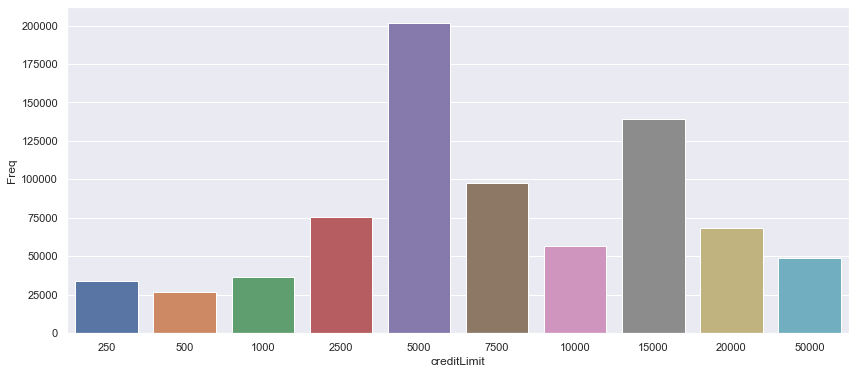

In [19]:
z=pd.DataFrame(transactions.groupby('creditLimit').count()['isFraud']).reset_index(drop=False)
z.columns=['creditLimit','Freq'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
sns.set_theme() # set theme
ax = sns.barplot(x="creditLimit", y="Freq", data=z) # draw barplot

**There are 12417 fraudulent cases among all population.**

In [20]:
transactions['isFraud'].value_counts() # distribution of fraud vs non-fraud cases

False    773946
True      12417
Name: isFraud, dtype: int64

**Ratio of fraudulent cases to all population is 1.58 % so the dataset is highly imbalanced.**

In [23]:
# Dataset is highly imbalanced
round(transactions['isFraud'].value_counts() [1] / len(transactions),4) # ratio: 1.579 %

0.0158

**There are 19 merchant categories such as rideshare, auto,hotels and fastfood.**

In [24]:
transactions['merchantCategoryCode'].unique() # list of merchant categories

array(['rideshare', 'entertainment', 'mobileapps', 'fastfood',
       'food_delivery', 'auto', 'online_retail', 'gym', 'health',
       'personal care', 'food', 'fuel', 'online_subscriptions',
       'online_gifts', 'hotels', 'airline', 'furniture', 'subscriptions',
       'cable/phone'], dtype=object)

In [25]:
transactions['merchantCategoryCode'].nunique() # size: 19 categories

19

**Top 3 categories are online, fastfood and entertainment in terms of the number of transactions.**

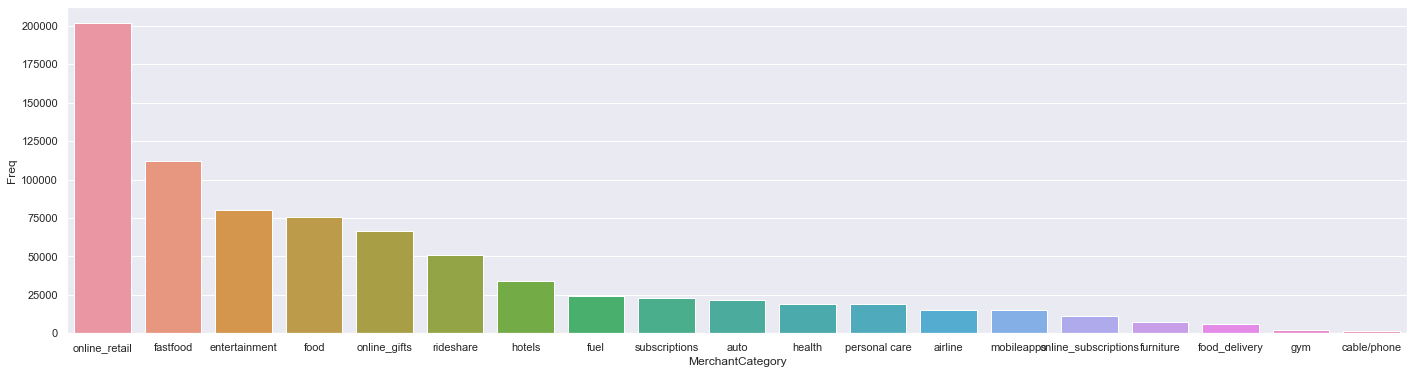

In [26]:
t=pd.DataFrame(transactions['merchantCategoryCode'].value_counts()).reset_index(drop=False)
t.columns=['MerchantCategory','Freq'] # rename columns
plt.figure(figsize=(24,6)) # adjust figure size
sns.set_theme() # set theme
ax = sns.barplot(x="MerchantCategory", y="Freq", data=t) # draw barplot

**The dataset includes transactions in 4 countries such as US, Canada, Mexico and Puerto Rico.**

In [27]:
transactions.acqCountry.unique()

array(['US', None, 'CAN', 'MEX', 'PR'], dtype=object)

In [28]:
transactions.merchantCountryCode.unique()

array(['US', 'CAN', None, 'PR', 'MEX'], dtype=object)

In [29]:
transactions.acqCountry.value_counts()

US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64

**There are 3 different transaction types such as Purchase, Address Verification and Reversal. Also, it includes some Null values in that feature.**

In [30]:
transactions['transactionType'].unique() # list of transaction type categories

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', None], dtype=object)

In [31]:
e=pd.DataFrame(transactions.transactionType.value_counts()).reset_index(drop=False)
e

,index,transactionType
0,PURCHASE,745193
1,REVERSAL,20303
2,ADDRESS_VERIFICATION,20169


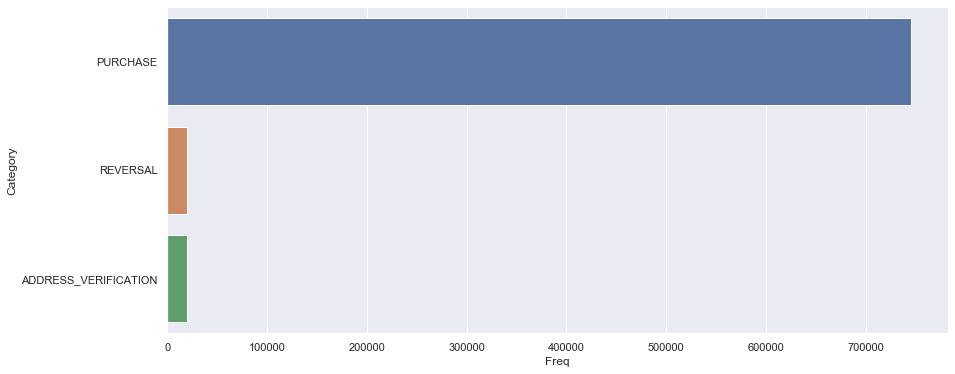

In [32]:
e=pd.DataFrame(transactions.transactionType.value_counts()).reset_index(drop=False)
e.columns=['Category','Freq'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
sns.set_theme() # set theme
ax = sns.barplot(x="Freq", y="Category", data=e) # draw barplot

**I created 'Date' column by splitting original 'TransactionDate' column.The dataset obtains transactions in year 2016.**

In [33]:
transactions['Date']=transactions['transactionDateTime'].apply(lambda x: x.split('T')[0]) # create 'Date' column

In [34]:
# Dataset includes all transactions during year 2016
transactions.transactionDateTime.min() # Start point: 2016-01-01 T 00:01:02

'2016-01-01T00:01:02'

In [35]:
transactions.transactionDateTime.max() # End point:   2016-12-30 T 23:59:45

'2016-12-30T23:59:45'

**I checked the key statistics of  transaction amounts. Maximum transaction amount was $2011. Also, average of transaction amount is 136.98 standard deviation of transaction amount was 147.72.**

In [36]:
transactions.transactionAmount.describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

**I plotted the transactions amounts by applying histogram. This shows that there is right skewed (positive skewness) distribution. Avg. of transaction amounts (136.98) is much higher than median of transaction amounts (87.90)**

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


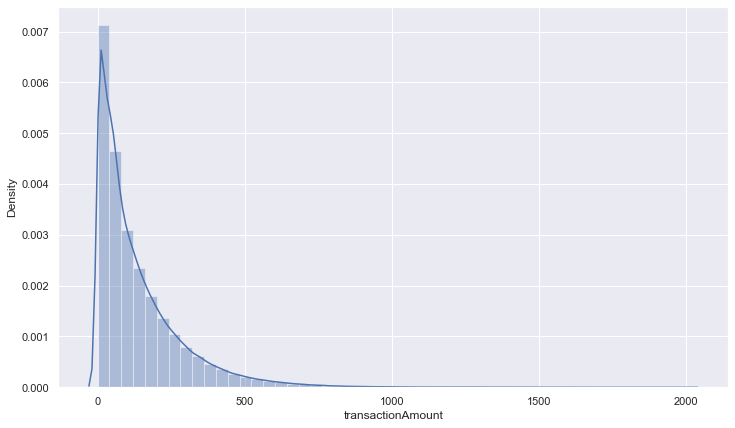

In [37]:
plt.figure(figsize=(12, 7))
sns.distplot(transactions.transactionAmount)

[Text(0, 0.5, 'Freq')]

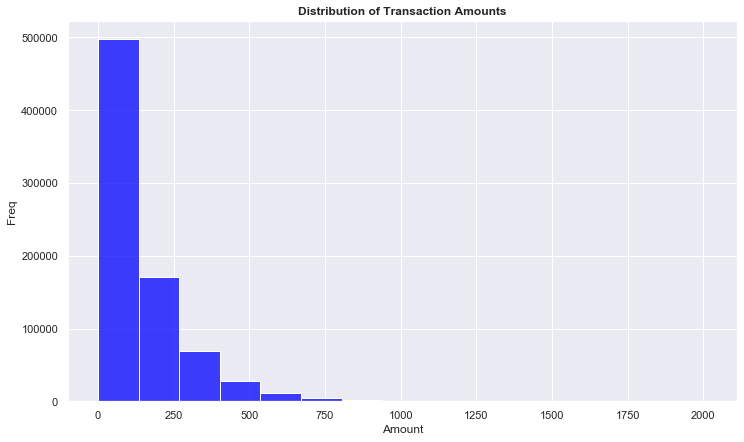

In [38]:
# visualize transaction amounts by using the histogram
sns.set()
plt.figure(figsize=(12, 7))
plt.title('Distribution of Transaction Amounts', weight='bold')
ax=sns.histplot(data=transactions, x="transactionAmount", color='blue',bins=15)
ax.set(xlabel='Amount')
ax.set(ylabel='Freq')

**61% of all transactions are less than specific transaction amount ($125) in the dataset.**

In [39]:
z=transactions[(transactions.transactionAmount < 125)]

In [40]:
round(len(z)/len(transactions),2)

0.61

**This table indicates how many transactions each account had for each merchant in year 2016.**

In [41]:
cust_length=transactions.groupby(['customerId','merchantName']).count()['Date']
cust_length=pd.DataFrame(cust_length).reset_index()
cust_length.columns=['customerId','merchantName','Count']
#cust_length=cust_length.sort_values(by='Count',ascending=False)
cust_length.head()
#cust_length.to_csv('zazaza.csv')

,customerId,merchantName,Count
0,100088067,1st BBQ,1
1,100088067,1st Pub,1
2,100088067,1st Sandwitch Bar #758805,1
3,100088067,34th BBQ #412895,1
4,100088067,AMC #191138,1


-----